<a href="https://colab.research.google.com/github/Cferro2793/proyecto_base_de_datos/blob/main/proyecto_datasc_cephalo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 13.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=9284b9c5b092ce5abd662774824f5e940a1b26238677ad5ac62be22fa6c3d4b7
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# Librerias

In [ ]:

import numpy as np#regularizacion lasso
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.impute import KNNImputer

# Funciones

In [ ]:
def val_knnimputer(X_imputter,val_name):
  imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Ajustamos el modelo e imputamos los missing values
  imputer.fit(X_imputter[[val_name]])
  X_imputter[val_name] = imputer.transform(X_imputter[[val_name]]).ravel()
 
  return X_imputter

# Cargar dataset

In [ ]:
#Montando el drive de google.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cephalo_dataset = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/base de datos_cefa.xlsx")#usamos pandas para organizar la tabla de datos y leer el formato excel
cephalo_dataset.shape

(104, 18)

# Limpieza

In [ ]:
cephalo_dataset.head()

,Id,impa(°),Incisivo superior a plano palatino(°),FMIA(°),FMA(°),SNA(°),SNB(°),U1-NA (°),L1-NB(°),overbite (mm),overjet (mm),spee curve (mm),U1-NA (mm),UL-EP (mm),LL-EP (mm),L1-NB(mm),L1-APG (mm),quirurgico/no
0,p1,94.6,90.8,58.0,27.4,80.4,73.4,0.0,27.2,4.2,3.0,2.0,2.7,5.5,5.7,3.50,-1.9,quirurgico
1,p2,98.3,121.3,52.7,29.0,85.4,78.3,27.1,32.6,5.7,3.9,2.4,3.3,1.5,0.0,6.68,2.7,quirurgico
2,p3,103.0,128.5,47.7,29.3,94.6,89.9,34.3,48.2,-3.4,1.6,2.6,10.5,-3.7,-11.0,16.20,15.5,no_quirurgico
3,p4,92.8,122.0,61.2,26.0,87.0,79.2,22.3,34.7,5.2,2.5,0.5,2.1,0.0,-2.9,6.80,2.0,quirurgico
4,p5,91.7,121.0,54.5,34.0,79.5,74.1,29.1,33.9,2.0,2.5,1.9,3.9,4.6,0.0,8.20,6.2,quirurgico


In [ ]:
cephalo_dataset.tail()

,Id,impa(°),Incisivo superior a plano palatino(°),FMIA(°),FMA(°),SNA(°),SNB(°),U1-NA (°),L1-NB(°),overbite (mm),overjet (mm),spee curve (mm),U1-NA (mm),UL-EP (mm),LL-EP (mm),L1-NB(mm),L1-APG (mm),quirurgico/no
99,p101,82.0,NaN,67.6,30.4,83.8,87.2,44.7,27.5,NaN,NaN,NaN,11.0,-4.2,0.1,5.8,NaN,quirurgico
100,p102,77.7,NaN,84.9,17.5,90.6,97.8,29.1,18.6,NaN,NaN,NaN,7.9,-10.6,-1.1,5.1,NaN,quirurgico
101,p103,100.7,NaN,48.5,30.7,86.7,82.0,35.8,30.3,NaN,NaN,NaN,12.4,0.5,5.2,7.4,NaN,quirurgico
102,p104,98.9,NaN,42.8,38.3,85.8,76.0,16.8,37.8,NaN,NaN,NaN,3.2,3.0,5.3,12.8,NaN,quirurgico
103,p105,93.8,NaN,61.3,24.9,91.4,82.5,13.4,30.2,NaN,NaN,NaN,0.9,2.8,5.2,6.9,NaN,quirurgico


In [ ]:
cephalo_dataset.isnull().sum()

Id                                        0
impa(°)                                   0
Incisivo superior a plano palatino(°)    27
FMIA(°)                                   0
FMA(°)                                    0
SNA(°)                                    0
SNB(°)                                    0
U1-NA (°)                                 0
L1-NB(°)                                  0
overbite (mm)                            27
overjet (mm)                             27
spee curve (mm)                          27
U1-NA (mm)                                0
UL-EP (mm)                                0
LL-EP (mm)                                0
L1-NB(mm)                                 0
L1-APG (mm)                              27
quirurgico/no                             0
dtype: int64

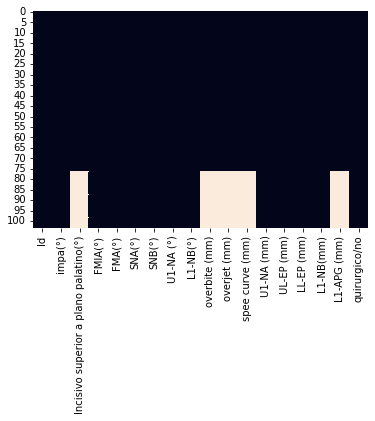

In [ ]:
sn.heatmap(cephalo_dataset.isnull(), cbar=False)#imprimo mapan de calor que me caracteriza donde estan los faltantes

In [ ]:
cephalo_dataset.describe()

,impa(°),Incisivo superior a plano palatino(°),FMIA(°),FMA(°),SNA(°),SNB(°),U1-NA (°),L1-NB(°),overbite (mm),overjet (mm),spee curve (mm),U1-NA (mm),UL-EP (mm),LL-EP (mm),L1-NB(mm),L1-APG (mm)
count,104.000000,77.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,77.000000,77.000000,77.000000,104.000000,104.000000,104.000000,104.000000,77.000000
mean,92.577885,116.902597,62.399038,25.033942,83.637500,80.916346,24.524038,29.952885,2.040260,2.715584,1.471429,5.626923,1.151923,0.940385,7.210385,4.789610
std,9.279521,10.365834,12.343573,9.541981,4.559151,4.928481,11.063800,8.947473,2.415589,2.715553,1.068676,4.199173,4.181257,3.917735,3.571162,3.825248
min,69.900000,90.800000,21.800000,6.800000,72.900000,68.600000,0.000000,9.200000,-6.400000,-7.200000,0.000000,-2.600000,-10.600000,-11.000000,-0.900000,-2.000000
25%,85.775000,110.000000,54.475000,18.550000,80.800000,78.075000,17.650000,25.375000,0.700000,2.000000,0.500000,2.775000,-1.400000,-1.150000,4.600000,2.200000
50%,93.700000,118.700000,63.200000,25.150000,83.350000,81.050000,24.400000,30.800000,2.100000,3.000000,1.300000,5.350000,1.800000,0.850000,6.800000,4.800000
75%,97.500000,122.600000,68.350000,30.725000,86.625000,83.025000,30.850000,34.925000,4.000000,4.400000,2.400000,8.400000,4.125000,3.175000,9.325000,7.400000
max,121.100000,152.800000,90.400000,71.800000,95.700000,97.800000,62.600000,51.000000,6.200000,8.000000,4.800000,18.000000,11.100000,13.500000,19.500000,15.500000


In [ ]:
cef_balan =cephalo_dataset
cef_balan =cef_balan.sort_values('quirurgico/no')
cef_balan = pd.DataFrame(cef_balan)

In [ ]:
cef_nq = cef_balan['quirurgico/no'] == "no_quirurgico"
cef_nq = cef_balan[cef_nq]
print(cef_nq.shape)

cef_q = cef_balan['quirurgico/no'] == "quirurgico"
cef_q = cef_balan[cef_q]
print(cef_q.shape)

(43, 18)
(61, 18)


In [ ]:
y_nq=pd.factorize(cef_nq['quirurgico/no'])#se conviertes los dos tipos de target entre 1 y 0

X_nq = cef_nq.loc[:,'impa(°)':'L1-APG (mm)']#se obtienen un slice con las caracteristicas
X_nq_imputt=X_nq

y_q=pd.factorize(cef_q['quirurgico/no'])#se conviertes los dos tipos de target entre 1 y 0

X_q = cef_q.loc[:,'impa(°)':'L1-APG (mm)']#se obtienen un slice con las caracteristicas
X_q_imputt=X_q

impa(°)                                  0
Incisivo superior a plano palatino(°)    0
FMIA(°)                                  0
FMA(°)                                   0
SNA(°)                                   0
SNB(°)                                   0
U1-NA (°)                                0
L1-NB(°)                                 0
overbite (mm)                            0
overjet (mm)                             0
spee curve (mm)                          0
U1-NA (mm)                               0
UL-EP (mm)                               0
LL-EP (mm)                               0
L1-NB(mm)                                0
L1-APG (mm)                              0
dtype: int64

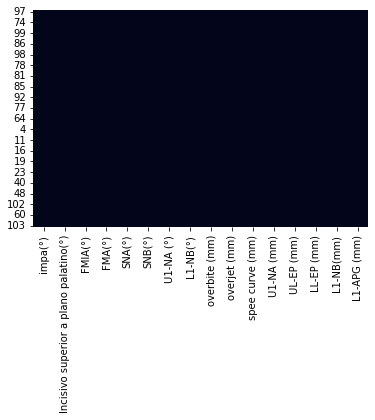

In [ ]:
variables= ["Incisivo superior a plano palatino(°)", "overbite (mm)", "overjet (mm)","spee curve (mm)", "L1-APG (mm)"]
for i in variables:
  val_knnimputer(X_q_imputt,i)

sn.heatmap(X_q_imputt.isnull(), cbar=False)
X_q_imputt.isnull().sum()

impa(°)                                  0
Incisivo superior a plano palatino(°)    0
FMIA(°)                                  0
FMA(°)                                   0
SNA(°)                                   0
SNB(°)                                   0
U1-NA (°)                                0
L1-NB(°)                                 0
overbite (mm)                            0
overjet (mm)                             0
spee curve (mm)                          0
U1-NA (mm)                               0
UL-EP (mm)                               0
LL-EP (mm)                               0
L1-NB(mm)                                0
L1-APG (mm)                              0
dtype: int64

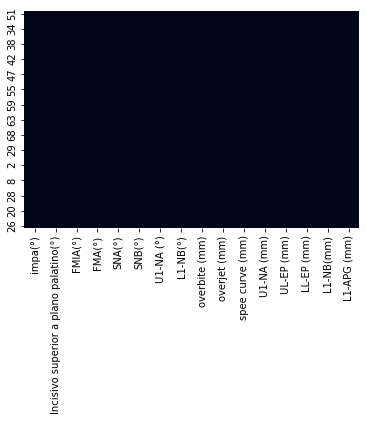

In [ ]:
variables= ["Incisivo superior a plano palatino(°)", "overbite (mm)", "overjet (mm)","spee curve (mm)", "L1-APG (mm)"]
for i in variables:
  val_knnimputer(X_nq_imputt,i)

sn.heatmap(X_nq_imputt.isnull(), cbar=False)
X_nq_imputt.isnull().sum()

# 1¿Existen diferencias claras en la distribución de los datos entre las medidas cefalométricas de tweed entre pacientes quirúrgicos y no quirúrgicos?

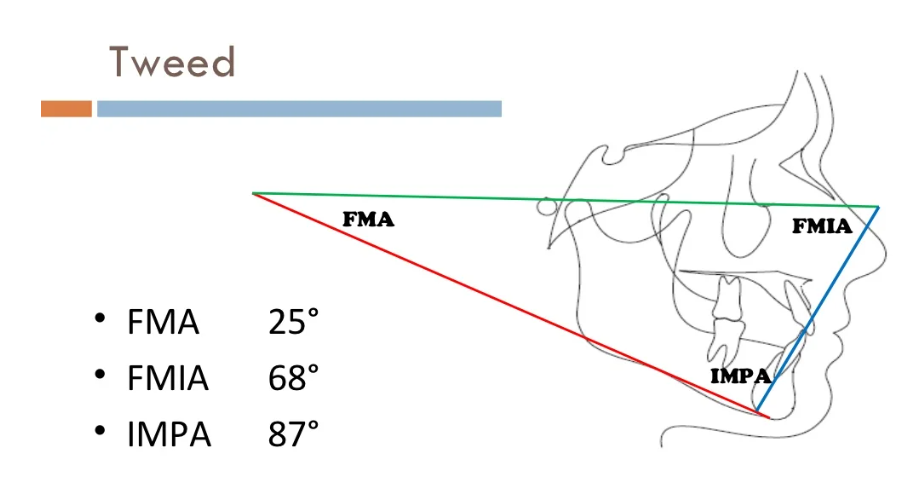

In [ ]:
cef_nq_tw=X_nq_imputt.loc[:,["impa(°)","FMIA(°)","FMA(°)"]]#se obtienen un slice con las caracteristicas
cef_q_tw=X_q_imputt.loc[:,["impa(°)","FMIA(°)","FMA(°)"]]#se obtienen un slice con las caracteristicas

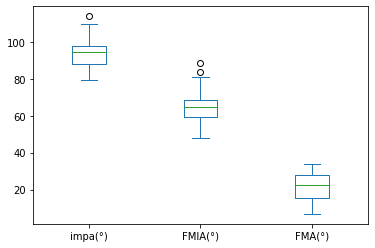

In [ ]:
cef_nq_tw.plot.box()

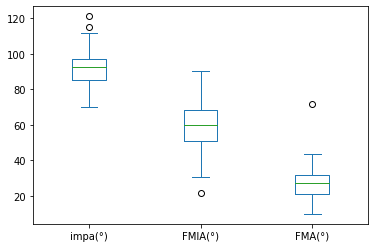

In [ ]:
cef_q_tw.plot.box()

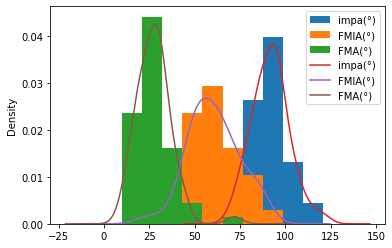

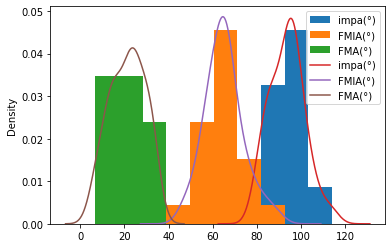

In [ ]:
plot = cef_q_tw.plot.hist(bins=10,density=True)

cef_q_tw.plot.density(ax=plot)
plot = cef_nq_tw.plot.hist(bins=10,density=True)

cef_nq_tw.plot.density(ax=plot)

Text(0.5, 1.0, 'impa(°) q vs nq')

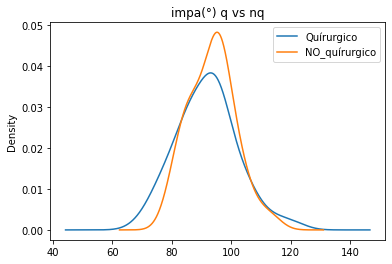

In [ ]:
impa = pd.DataFrame({"Quírurgico": cef_q_tw["impa(°)"],
                   "NO_quírurgico": cef_nq_tw["impa(°)"],})
ax3 = impa.plot.kde()
ax3.set_title('impa(°) q vs nq')

Text(0.5, 1.0, 'FMIA(°) q vs nq')

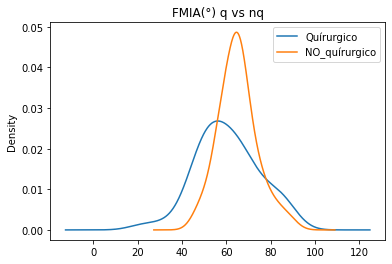

In [ ]:
FMIA = pd.DataFrame({"Quírurgico": cef_q_tw["FMIA(°)"],
                   "NO_quírurgico": cef_nq_tw["FMIA(°)"],})
ax3 = FMIA.plot.kde()
ax3.set_title('FMIA(°) q vs nq')

Text(0.5, 1.0, 'FMA(°) q vs nq')

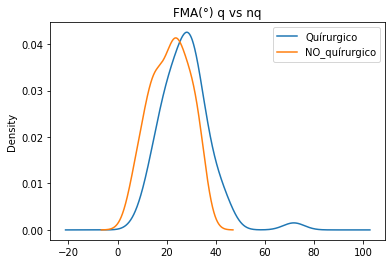

In [ ]:
FMA = pd.DataFrame({"Quírurgico": cef_q_tw["FMA(°)"],
                   "NO_quírurgico": cef_nq_tw["FMA(°)"],})
ax3 = FMA.plot.kde()
ax3.set_title('FMA(°) q vs nq')

In [ ]:
cef_q_tw.describe()


,impa(°),FMIA(°),FMA(°)
count,61.000000,61.000000,61.000000
mean,91.881967,60.513115,27.623443
std,10.191982,14.186725,9.829996
min,69.900000,21.800000,9.800000
25%,85.200000,51.000000,20.900000
50%,92.300000,60.100000,27.400000
75%,97.200000,68.500000,31.600000
max,121.100000,90.400000,71.800000


In [ ]:
cef_nq_tw.describe()

,impa(°),FMIA(°),FMA(°)
count,43.000000,43.000000,43.000000
mean,93.565116,65.074419,21.360465
std,7.815183,8.581461,7.854424
min,79.600000,47.700000,6.800000
25%,88.100000,59.550000,15.300000
50%,94.600000,64.800000,22.300000
75%,97.600000,68.250000,28.100000
max,113.900000,88.500000,33.600000


# 2¿Existen diferencias claras en la distribución de los datos entre las medidas cefalométricas de Steiner entre pacientes quirúrgicos y no quirúrgicos?

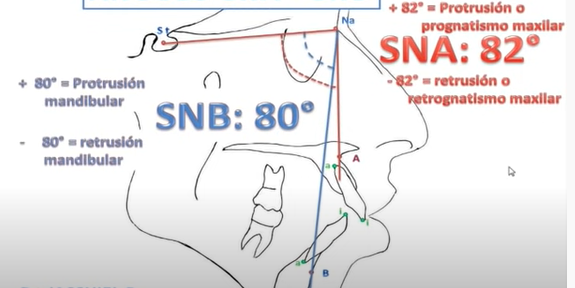

In [ ]:
cef_nq_St=X_nq_imputt.loc[:,"SNA(°)":"SNB(°)"]#se obtienen un slice con las caracteristicas
cef_q_St=X_q_imputt.loc[:,"SNA(°)":"SNB(°)"]#se obtienen un slice con las caracteristicas

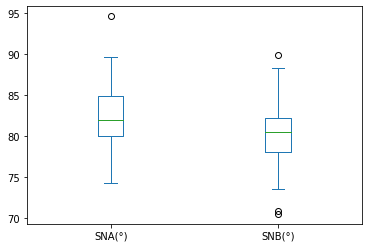

In [ ]:
cef_nq_St.plot.box()

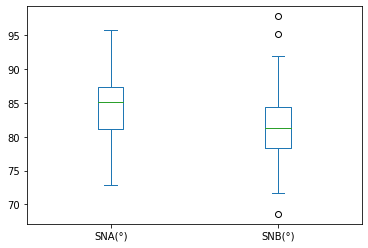

In [ ]:
cef_q_St.plot.box()

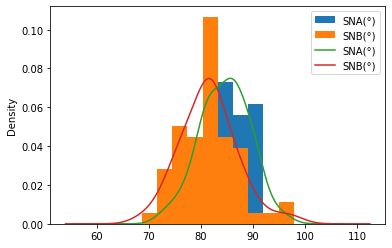

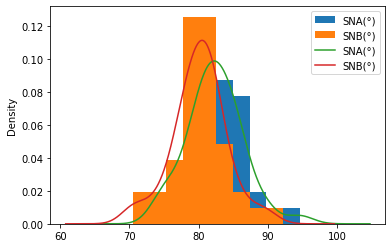

In [ ]:
plot = cef_q_St.plot.hist(bins=10,density=True)

cef_q_St.plot.density(ax=plot)
plot = cef_nq_St.plot.hist(bins=10,density=True)

cef_nq_St.plot.density(ax=plot)

Text(0.5, 1.0, 'SNA(°) q vs nq')

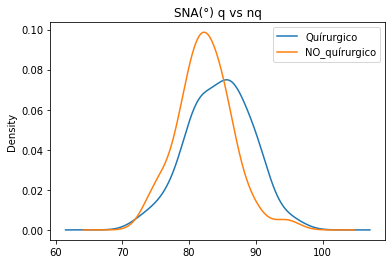

In [ ]:
SNA = pd.DataFrame({"Quírurgico": cef_q_St["SNA(°)"],
                   "NO_quírurgico": cef_nq_St["SNA(°)"]})
ax3 = SNA.plot.kde()
ax3.set_title('SNA(°) q vs nq')

Text(0.5, 1.0, 'SNB(°) q vs nq')

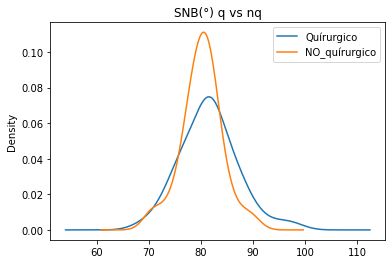

In [ ]:
SNB = pd.DataFrame({"Quírurgico": cef_q_St["SNB(°)"],
                   "NO_quírurgico": cef_nq_St["SNB(°)"]})
ax3 = SNB.plot.kde()
ax3.set_title('SNB(°) q vs nq')

In [ ]:
cef_q_St.describe()

,SNA(°),SNB(°)
count,61.000000,61.000000
mean,84.536066,81.486885
std,4.714801,5.512455
min,72.900000,68.600000
25%,81.200000,78.300000
50%,85.100000,81.300000
75%,87.400000,84.400000
max,95.700000,97.800000


In [ ]:
cef_nq_St.describe()

,SNA(°),SNB(°)
count,43.000000,43.000000
mean,82.362791,80.106977
std,4.047517,3.874851
min,74.300000,70.500000
25%,80.050000,78.050000
50%,82.000000,80.500000
75%,84.900000,82.150000
max,94.600000,89.900000


# 3 cuál es la prevalencia de pacientes retrognáticos y prognáticos maxilares

In [ ]:
cef_nq_Pr=X_nq_imputt.loc[:,"SNA(°)"]#se obtienen un slice con las caracteristicas
cef_q_Pr=X_q_imputt.loc[:,"SNA(°)"]#se obtienen un slice con las caracteristicas

In [ ]:
cef_nq_Pr.describe()

count    43.000000
mean     82.362791
std       4.047517
min      74.300000
25%      80.050000
50%      82.000000
75%      84.900000
max      94.600000
Name: SNA(°), dtype: float64

In [ ]:
cef_q_Pr.describe()

count    61.000000
mean     84.536066
std       4.714801
min      72.900000
25%      81.200000
50%      85.100000
75%      87.400000
max      95.700000
Name: SNA(°), dtype: float64

El porcentaje de pacientes no quirúrgicos retrognáticos maxilares es : 48.837209302325576
El porcentaje de pacientes no quirúrgicos Prognáticos maxilares es : 48.837209302325576
El porcentaje de pacientes no quirúrgicos con SNA normal : 2.3255813953488373


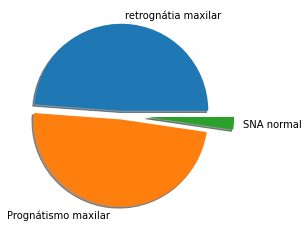

In [ ]:
Retrogna_nq = cef_nq_Pr[(cef_nq_Pr < 82)]
Progna_nq = cef_nq_Pr[(cef_nq_Pr > 82)]
no_p =cef_nq_Pr[(cef_nq_Pr == 82)]
Retrogna_por=(len(Retrogna_nq)/len(cef_nq_Pr))*100
print("El porcentaje de pacientes no quirúrgicos retrognáticos maxilares es :", Retrogna_por)
Progna_por=(len(Progna_nq)/len(cef_nq_Pr))*100
print("El porcentaje de pacientes no quirúrgicos Prognáticos maxilares es :", Progna_por)
no_p_por=(len(no_p)/len(cef_nq_Pr))*100
print("El porcentaje de pacientes no quirúrgicos con SNA normal :", no_p_por)

mylabels = ["retrognátia maxilar", "Prognátismo maxilar", "SNA normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([Retrogna_por,Progna_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

El porcentaje de pacientes quirúrgicos retrognaticos maxilares es : 29.508196721311474
El porcentaje de pacientes quirúrgicos Prognaticos maxilares es : 67.21311475409836
El porcentaje de pacientes quirúrgicos con SNA normal : 3.278688524590164


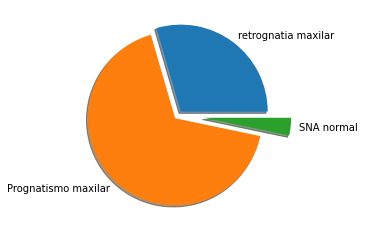

In [ ]:
Retrogna_q = cef_q_Pr[(cef_q_Pr < 82)]
Progna_q = cef_q_Pr[(cef_q_Pr > 82)]
no_p_q =cef_q_Pr[(cef_q_Pr == 82)]
Retrogna_por=(len(Retrogna_q)/len(cef_q_Pr))*100
print("El porcentaje de pacientes quirúrgicos retrognaticos maxilares es :", Retrogna_por)
Progna_por=(len(Progna_q)/len(cef_q_Pr))*100
print("El porcentaje de pacientes quirúrgicos Prognaticos maxilares es :", Progna_por)
no_pq_por=(len(no_p_q)/len(cef_q_Pr))*100
print("El porcentaje de pacientes quirúrgicos con SNA normal :", no_pq_por)
mylabels = ["retrognatia maxilar", "Prognatismo maxilar", "SNA normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([Retrogna_por,Progna_por,no_pq_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

# 4 cuál es la prevalencia de pacientes retrognáticos y prognáticos mandibulares

In [ ]:
cef_nq_Pr=X_nq_imputt.loc[:,"SNB(°)"]#se obtienen un slice con las caracteristicas
cef_q_Pr=X_q_imputt.loc[:,"SNB(°)"]#se obtienen un slice con las caracteristicas

In [ ]:
cef_nq_Pr.describe()

count    43.000000
mean     80.106977
std       3.874851
min      70.500000
25%      78.050000
50%      80.500000
75%      82.150000
max      89.900000
Name: SNB(°), dtype: float64

In [ ]:
cef_q_Pr.describe()

count    61.000000
mean     81.486885
std       5.512455
min      68.600000
25%      78.300000
50%      81.300000
75%      84.400000
max      97.800000
Name: SNB(°), dtype: float64

El porcentaje de pacientes no quirúrgicos retrognáticos mandibular es : 46.51162790697674
El porcentaje de pacientes no quirúrgicos Prognáticos mandibular es : 51.162790697674424
El porcentaje de pacientes no quirúrgicos con SNB normal : 2.3255813953488373


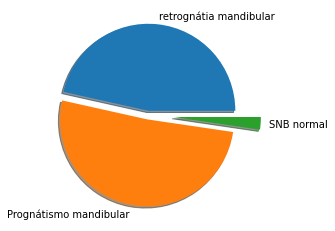

In [ ]:
Retrogna_nq = cef_nq_Pr[(cef_nq_Pr < 80)]
Progna_nq = cef_nq_Pr[(cef_nq_Pr > 80)]
no_p =cef_nq_Pr[(cef_nq_Pr == 80)]
Retrogna_por=(len(Retrogna_nq)/len(cef_nq_Pr))*100
print("El porcentaje de pacientes no quirúrgicos retrognáticos mandibular es :", Retrogna_por)
Progna_por=(len(Progna_nq)/len(cef_nq_Pr))*100
print("El porcentaje de pacientes no quirúrgicos Prognáticos mandibular es :", Progna_por)
no_p_por=(len(no_p)/len(cef_nq_Pr))*100
print("El porcentaje de pacientes no quirúrgicos con SNB normal :", no_p_por)

mylabels = ["retrognátia mandibular", "Prognátismo mandibular", "SNB normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([Retrogna_por,Progna_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

El porcentaje de pacientes  quirúrgicos retrognáticos mandibular es : 36.0655737704918
El porcentaje de pacientes  quirúrgicos Prognáticos mandibular es : 62.295081967213115
El porcentaje de pacientes  quirúrgicos con SNB normal : 1.639344262295082


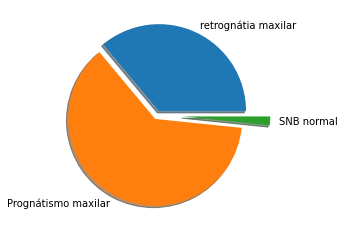

In [ ]:
Retrogna_q = cef_q_Pr[(cef_q_Pr < 80)]
Progna_q = cef_q_Pr[(cef_q_Pr > 80)]
no_p_q =cef_q_Pr[(cef_q_Pr == 80)]
Retrogna_por=(len(Retrogna_q)/len(cef_q_Pr))*100
print("El porcentaje de pacientes  quirúrgicos retrognáticos mandibular es :", Retrogna_por)
Progna_por=(len(Progna_q)/len(cef_q_Pr))*100
print("El porcentaje de pacientes  quirúrgicos Prognáticos mandibular es :", Progna_por)
no_pq_por=(len(no_p_q)/len(cef_q_Pr))*100
print("El porcentaje de pacientes  quirúrgicos con SNB normal :", no_pq_por)
mylabels = ["retrognátia maxilar", "Prognátismo maxilar", "SNB normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([Retrogna_por,Progna_por,no_pq_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

# 5 cuál es la prevalencia de protrusión e intrusión incisal superior e inferior en pacientes quirúrgicos y no quirúrgicos

In [ ]:
Cef_nq_ins=X_nq_imputt.loc[:,["U1-NA (°)",	"L1-NB(°)","U1-NA (mm)","L1-NB(mm)"]]#se obtienen un slice con las caracteristicas
Cef_q_ins=X_q_imputt.loc[:,["U1-NA (°)",	"L1-NB(°)","U1-NA (mm)","L1-NB(mm)"]]#se obtienen un slice con las caracteristicas

In [ ]:
Cef_nq_ins.describe()

,U1-NA (°),L1-NB(°),U1-NA (mm),L1-NB(mm)
count,43.000000,43.000000,43.000000,43.000000
mean,27.141860,29.674419,6.232558,6.686047
std,9.471266,7.415977,3.721349,3.453265
min,9.700000,10.800000,-0.200000,0.900000
25%,21.200000,26.150000,3.800000,4.600000
50%,26.400000,31.000000,6.100000,6.400000
75%,33.950000,33.650000,8.800000,8.350000
max,62.600000,48.200000,18.000000,16.200000


In [ ]:
Cef_q_ins.describe()

,U1-NA (°),L1-NB(°),U1-NA (mm),L1-NB(mm)
count,61.000000,61.000000,61.000000,61.000000
mean,22.678689,30.149180,5.200000,7.580000
std,11.788400,9.941791,4.486424,3.634492
min,0.000000,9.200000,-2.600000,-0.900000
25%,15.300000,22.400000,2.000000,4.700000
50%,23.800000,30.600000,5.000000,7.200000
75%,30.000000,36.800000,7.900000,9.600000
max,44.700000,51.000000,15.700000,19.500000


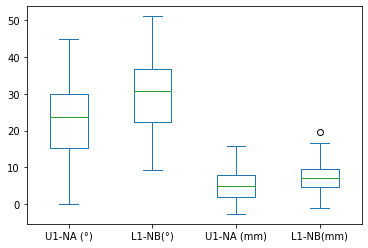

In [ ]:
Cef_q_ins.plot.box()

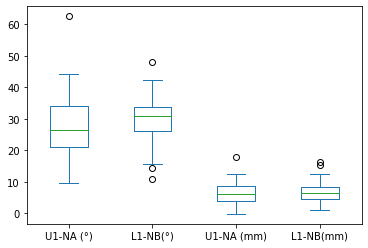

In [ ]:
Cef_nq_ins.plot.box()

El porcentaje de pacientes no quirúrgicos con retrusión incisal superior  : 37.2093023255814
El porcentaje de pacientes no quirúrgicos con protrusión incisal superior : 62.7906976744186
El porcentaje de pacientes no quirúrgicos con ángulo U1-NA normal : 0.0


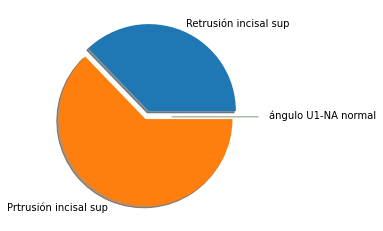

El porcentaje de pacientes no quirúrgicos con retrusión incisal superior : 27.906976744186046
El porcentaje de pacientes no quirúrgicos con protrusión incisal superior : 72.09302325581395
El porcentaje de pacientes no quirúrgicos con distancia U1-NA normal : 0.0


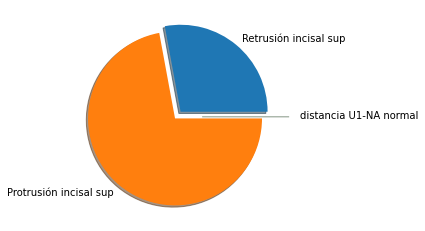

In [ ]:
retru_nq = Cef_nq_ins[(Cef_nq_ins["U1-NA (°)"] < 22)]
protru_nq = Cef_nq_ins[(Cef_nq_ins["U1-NA (°)"] > 22)]
no_p =Cef_nq_ins[(Cef_nq_ins["U1-NA (°)"] == 22)]
retru_por=(len(retru_nq)/len(Cef_nq_ins["U1-NA (°)"]))*100
print("El porcentaje de pacientes no quirúrgicos con retrusión incisal superior  :", retru_por)
protru_por=(len(protru_nq)/len(Cef_nq_ins["U1-NA (°)"]))*100
print("El porcentaje de pacientes no quirúrgicos con protrusión incisal superior :", protru_por)
no_p_por=(len(no_p)/len(Cef_nq_ins["U1-NA (°)"]))*100
print("El porcentaje de pacientes no quirúrgicos con ángulo U1-NA normal :", no_p_por)

mylabels = ["Retrusión incisal sup", "Prtrusión incisal sup", "ángulo U1-NA normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retru_por,protru_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

retru_nq_d = Cef_nq_ins[(Cef_nq_ins["U1-NA (mm)"] < 4)]
protru_nq_d = Cef_nq_ins[(Cef_nq_ins["U1-NA (mm)"] > 4)]
no_p =Cef_nq_ins[(Cef_nq_ins["U1-NA (mm)"] == 4)]
retru_por=(len(retru_nq_d)/len(Cef_nq_ins["U1-NA (mm)"]))*100
print("El porcentaje de pacientes no quirúrgicos con retrusión incisal superior :", retru_por)
protru_por=(len(protru_nq_d)/len(Cef_nq_ins["U1-NA (mm)"]))*100
print("El porcentaje de pacientes no quirúrgicos con protrusión incisal superior :", protru_por)
no_p_por=(len(no_p)/len(Cef_nq_ins["U1-NA (mm)"]))*100
print("El porcentaje de pacientes no quirúrgicos con distancia U1-NA normal :", no_p_por)

mylabels = ["Retrusión incisal sup", "Protrusión incisal sup", "distancia U1-NA normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retru_por,protru_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

El porcentaje de pacientes no quirúrgicos con retrusión incisal inferior : 18.6046511627907
El porcentaje de pacientes no quirúrgicos con protrusión incisal inferior : 81.3953488372093
El porcentaje de pacientes no quirúrgicos con ángulo U1-NA normal : 0.0


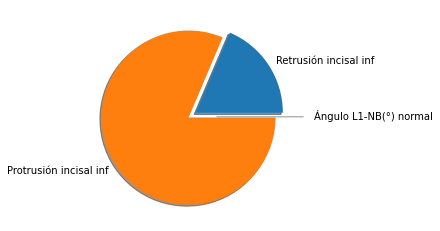

El porcentaje de pacientes no quirúrgicos con retrusión incisal inferior : 20.930232558139537
El porcentaje de pacientes no quirúrgicos con protrusión incisal inferior : 79.06976744186046
El porcentaje de pacientes no quirúrgicos con distancia U1-NA normal : 0.0


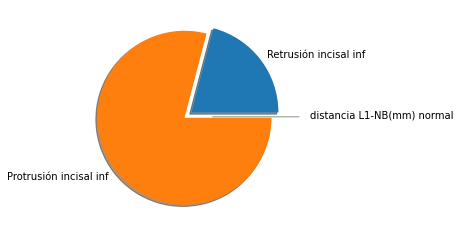

In [ ]:
retru_nq = Cef_nq_ins[(Cef_nq_ins["L1-NB(°)"] < 25)]
protru_nq = Cef_nq_ins[(Cef_nq_ins["L1-NB(°)"] > 25)]
no_p =Cef_nq_ins[(Cef_nq_ins["L1-NB(°)"] == 25)]
retru_por=(len(retru_nq)/len(Cef_nq_ins["L1-NB(°)"]))*100
print("El porcentaje de pacientes no quirúrgicos con retrusión incisal inferior :", retru_por)
protru_por=(len(protru_nq)/len(Cef_nq_ins["L1-NB(°)"]))*100
print("El porcentaje de pacientes no quirúrgicos con protrusión incisal inferior :", protru_por)
no_p_por=(len(no_p)/len(Cef_nq_ins["L1-NB(°)"]))*100
print("El porcentaje de pacientes no quirúrgicos con ángulo U1-NA normal :", no_p_por)

mylabels = ["Retrusión incisal inf", "Protrusión incisal inf", "Ángulo L1-NB(°) normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retru_por,protru_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

retru_nq_d = Cef_nq_ins[(Cef_nq_ins["L1-NB(mm)"] < 4)]
protru_nq_d = Cef_nq_ins[(Cef_nq_ins["L1-NB(mm)"] > 4)]
no_p =Cef_nq_ins[(Cef_nq_ins["L1-NB(mm)"] == 4)]
retru_por=(len(retru_nq_d)/len(Cef_nq_ins["L1-NB(mm)"]))*100
print("El porcentaje de pacientes no quirúrgicos con retrusión incisal inferior :", retru_por)
protru_por=(len(protru_nq_d)/len(Cef_nq_ins["L1-NB(mm)"]))*100
print("El porcentaje de pacientes no quirúrgicos con protrusión incisal inferior :", protru_por)
no_p_por=(len(no_p)/len(Cef_nq_ins["L1-NB(mm)"]))*100
print("El porcentaje de pacientes no quirúrgicos con distancia U1-NA normal :", no_p_por)

mylabels = ["Retrusión incisal inf", "Protrusión incisal inf", "distancia L1-NB(mm) normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retru_por,protru_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

El porcentaje de pacientes  quirúrgicos con retrusión incisal superior  : 44.26229508196721
El porcentaje de pacientes  quirúrgicos con protrusión incisal superior : 55.73770491803278
El porcentaje de pacientes  quirúrgicos con ángulo U1-NA normal : 0.0


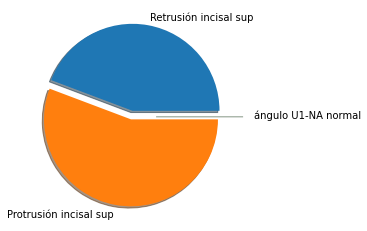

El porcentaje de pacientes  quirúrgicos con retrusión incisal superior : 44.26229508196721
El porcentaje de pacientes  quirúrgicos con protrusión incisal superior : 55.73770491803278
El porcentaje de pacientes quirúrgicos con distancia U1-NA normal : 0.0


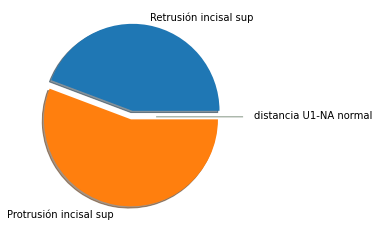

In [ ]:
retru_q = Cef_q_ins[(Cef_q_ins["U1-NA (°)"] < 22)]
protru_q = Cef_q_ins[(Cef_q_ins["U1-NA (°)"] > 22)]
no_p =Cef_q_ins[(Cef_q_ins["U1-NA (°)"] == 22)]
retru_por=(len(retru_q)/len(Cef_q_ins["U1-NA (°)"]))*100
print("El porcentaje de pacientes  quirúrgicos con retrusión incisal superior  :", retru_por)
protru_por=(len(protru_q)/len(Cef_q_ins["U1-NA (°)"]))*100
print("El porcentaje de pacientes  quirúrgicos con protrusión incisal superior :", protru_por)
no_p_por=(len(no_p)/len(Cef_q_ins["U1-NA (°)"]))*100
print("El porcentaje de pacientes  quirúrgicos con ángulo U1-NA normal :", no_p_por)

mylabels = ["Retrusión incisal sup", "Protrusión incisal sup", "ángulo U1-NA normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retru_por,protru_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

retru_q_d = Cef_q_ins[(Cef_q_ins["U1-NA (mm)"] < 4)]
protru_q_d = Cef_q_ins[(Cef_q_ins["U1-NA (mm)"] > 4)]
no_p =Cef_q_ins[(Cef_q_ins["U1-NA (mm)"] == 4)]
retrud_por=(len(retru_q_d)/len(Cef_q_ins["U1-NA (mm)"]))*100
print("El porcentaje de pacientes  quirúrgicos con retrusión incisal superior :", retrud_por)
protrud_por=(len(protru_q_d)/len(Cef_q_ins["U1-NA (mm)"]))*100
print("El porcentaje de pacientes  quirúrgicos con protrusión incisal superior :", protrud_por)
nod_p_por=(len(no_p)/len(Cef_q_ins["U1-NA (mm)"]))*100
print("El porcentaje de pacientes quirúrgicos con distancia U1-NA normal :", nod_p_por)

mylabels = ["Retrusión incisal sup", "Protrusión incisal sup", "distancia U1-NA normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retrud_por,protrud_por,nod_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

El porcentaje de pacientes  quirúrgicos con retrusión incisal inferior  : 27.86885245901639
El porcentaje de pacientes  quirúrgicos con protrusión incisal inferior : 72.1311475409836
El porcentaje de pacientes  quirúrgicos con ángulo L1-NB normal : 0.0


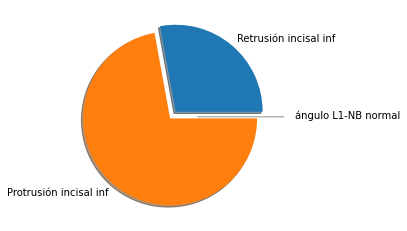

El porcentaje de pacientes  quirúrgicos con retrusión incisal inferior : 18.0327868852459
El porcentaje de pacientes  quirúrgicos con protrusión incisal inferior : 81.9672131147541
El porcentaje de pacientes quirúrgicos con distancia L1-NB normal : 0.0


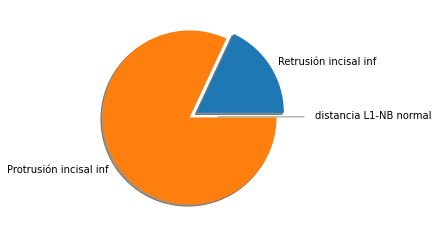

In [ ]:
retru_q = Cef_q_ins[(Cef_q_ins["L1-NB(°)"] < 25)]
protru_q = Cef_q_ins[(Cef_q_ins["L1-NB(°)"] > 25)]
no_p =Cef_q_ins[(Cef_q_ins["L1-NB(°)"] == 25)]
retru_por=(len(retru_q)/len(Cef_q_ins["L1-NB(°)"]))*100
print("El porcentaje de pacientes  quirúrgicos con retrusión incisal inferior  :", retru_por)
protru_por=(len(protru_q)/len(Cef_q_ins["L1-NB(°)"]))*100
print("El porcentaje de pacientes  quirúrgicos con protrusión incisal inferior :", protru_por)
no_p_por=(len(no_p)/len(Cef_q_ins["L1-NB(°)"]))*100
print("El porcentaje de pacientes  quirúrgicos con ángulo L1-NB normal :", no_p_por)

mylabels = ["Retrusión incisal inf", "Protrusión incisal inf", "ángulo L1-NB normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retru_por,protru_por,no_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()

retru_q_d = Cef_q_ins[(Cef_q_ins["L1-NB(mm)"] < 4)]
protru_q_d = Cef_q_ins[(Cef_q_ins["L1-NB(mm)"] > 4)]
no_p =Cef_q_ins[(Cef_q_ins["L1-NB(mm)"] == 4)]
retrud_por=(len(retru_q_d)/len(Cef_q_ins["L1-NB(mm)"]))*100
print("El porcentaje de pacientes  quirúrgicos con retrusión incisal inferior :", retrud_por)
protrud_por=(len(protru_q_d)/len(Cef_q_ins["L1-NB(mm)"]))*100
print("El porcentaje de pacientes  quirúrgicos con protrusión incisal inferior :", protrud_por)
nod_p_por=(len(no_p)/len(Cef_q_ins["L1-NB(mm)"]))*100
print("El porcentaje de pacientes quirúrgicos con distancia L1-NB normal :", nod_p_por)

mylabels = ["Retrusión incisal inf", "Protrusión incisal inf", "distancia L1-NB normal"]
myexplode = [0.05, 0.05, 0.3]
plt.pie([retrud_por,protrud_por,nod_p_por],labels = mylabels,explode = myexplode, shadow = True)
plt.show()